## Problem Statement

Perform EDA and extract insights to explain the 15% attrition the in the company

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from pathlib import Path

In [2]:
dataset_path = Path("./attrition_data.csv")

df = pd.read_csv(dataset_path)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

### Dropping null fields

In [6]:
print(f'Data lost is: {((df.shape[0] - df.dropna().shape[0])*100)/df.shape[0]:.2f}%')
df = df.dropna()

Data lost is: 2.49%


### Dropping duplicates

In [7]:
# No duplicats found
print(df[df.duplicated()].shape)

(0, 29)


### What features are relevant to perform an EDA?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked       4300

### Features of high importance

1. EnvironmentSatisfaction
2. JobSatisfaction
3. WorkLifeBalance
4. JobInvolvement
5. PerformanceRating
6. Attrition
7. MonthlyIncome
8. Department
9. JobLevel
10. JobRole
11. Age

### Features of medium importance

1. YearsSinceLastPromotion
2. TrainingTimesLastYear
3. TotalWorkingYears
4. NumCompaniesWorked
5. PercentSalaryHike
6. Education
7. EducationField

### Features of Low Importance

1. BusinessTravel
2. DistanceFromHome
3. Over18
4. StandardHours
5. EmployeeCount
6. Gender
7. StockOptionLevel
8. YearsWithCurrManager
9. MaritalStatus



In [9]:
print(df["EmployeeCount"].unique())
print(df["StandardHours"].unique())

[1]
[8]


In [10]:
# Dropping irrelevant features
df.drop(labels=["Over18",
                "StandardHours",
                "EmployeeCount",
                "Gender",
                "DistanceFromHome",
                "BusinessTravel",
                "StockOptionLevel"
                ],
        axis=1, inplace=True, errors="ignore")

In [11]:
# YearsWithCurrManager and MaritalStatus will not explain the 15% attrition
df.drop(labels=["YearsWithCurrManager", "MaritalStatus"],axis=1, inplace=True)

In [12]:
ages = df["Age"].sort_values().unique()
emps = df.groupby(by=["Age"]).count()


In [13]:
j = 5000

new_data = {
    "EmployeeID": [],
    "Age": [],
    "Attrition": []
}
for i in ages:

    new_data["EmployeeID"].append(j)
    new_data["Age"].append(i)
    new_data["Attrition"].append("No")
    new_data["EmployeeID"].append(j+1)
    new_data["Age"].append(i)
    new_data["Attrition"].append("Yes")
    
    j = j+2

new_df = pd.concat([df, pd.DataFrame(new_data)])
age_attrition = new_df.groupby(by=["Age", "Attrition"]).count()["EmployeeID"].to_numpy().reshape((len(ages),2))

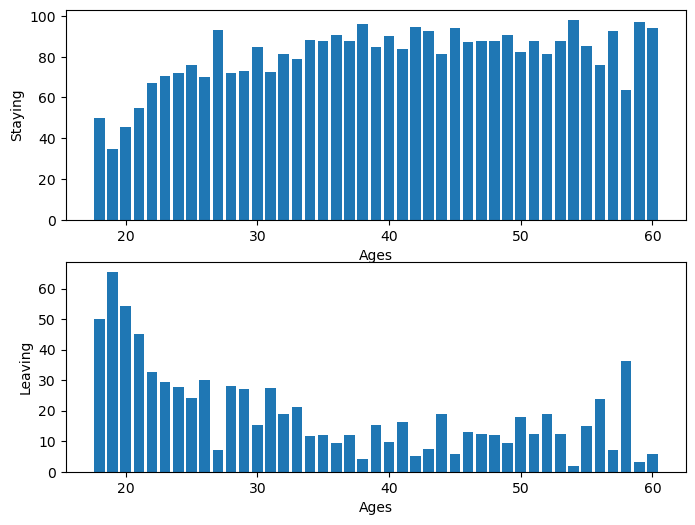

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].bar(ages,(age_attrition[:,0]*100)/np.sum(age_attrition,axis=1))
axs[0].set_xlabel("Ages")
axs[0].set_ylabel("Staying")

axs[1].bar(ages,(age_attrition[:,1]*100)/np.sum(age_attrition,axis=1))
axs[1].set_xlabel("Ages")
axs[1].set_ylabel("Leaving")


plt.show()

In [15]:
age_attrition_correlation = np.corrcoef(ages, (age_attrition[:, 1]*100)/np.sum(age_attrition, axis=1))[0, 1]
age_attrition_correlation

-0.6347442632343375

1. Age is negatively correlated with attrition
2. Younger employees have higer attrition than employees in middle ages
3. Again there is some spike in attrition at age around 58

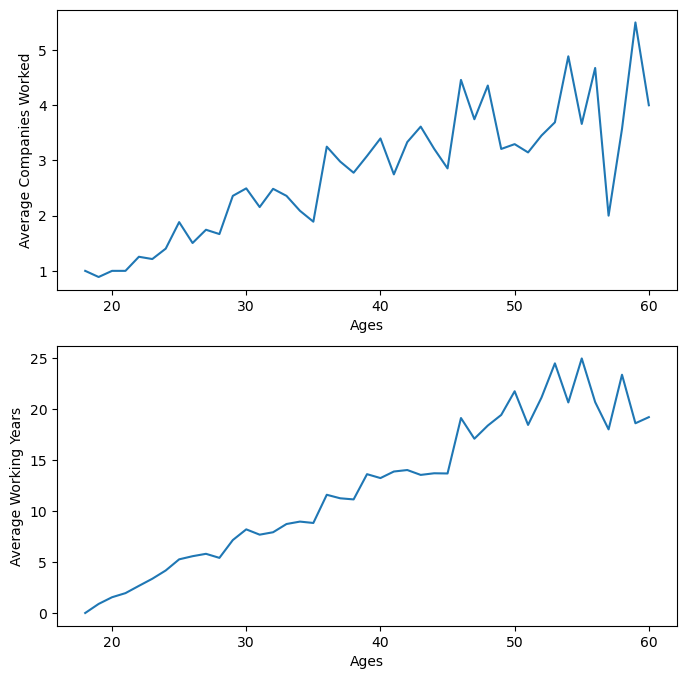

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))


axs[0].plot(ages, df[["EmployeeID", "Age", "NumCompaniesWorked"]]
            .groupby(by=["Age"])
            .mean()["NumCompaniesWorked"])
axs[0].set_xlabel("Ages")
axs[0].set_ylabel("Average Companies Worked")
axs[1].plot(ages, df[["EmployeeID", "Age", "TotalWorkingYears"]]
            .groupby(by=["Age"])
            .mean()["TotalWorkingYears"]
            )
axs[1].set_xlabel("Ages")
axs[1].set_ylabel("Average Working Years")
plt.show()

1. Age is positively correlated with TotalCompaniesWorked and TotalWorkingYears
2. There is a chance, Salary Hike influence on attrition
3. There is uncertainity about following features 
    1. YearsSinceLastPromotion
    2. TrainingTimesLastYear
    

In [17]:
promotion_attrition = pd.get_dummies(df[["YearsSinceLastPromotion", "Attrition"]],
                                     dtype=int, drop_first=True).groupby(by=["YearsSinceLastPromotion"]).sum()

print(np.corrcoef(
    promotion_attrition["Attrition_Yes"].to_numpy(),
    df["YearsSinceLastPromotion"].sort_values().unique()
)[0,1]
)
promotion_attrition

-0.6494027738193993


,Attrition_Yes
YearsSinceLastPromotion,
0,320
1,144
2,79
3,27
4,15
5,6
6,18
7,47
8,0


In [18]:
training_attrition = pd.get_dummies(df[["TrainingTimesLastYear", "Attrition"]],
                                     dtype=int, drop_first=True).groupby(by=["TrainingTimesLastYear"]).sum()

print(np.corrcoef(
    training_attrition["Attrition_Yes"].to_numpy(),
    df["TrainingTimesLastYear"].sort_values().unique()
)[0,1])

training_attrition

-0.16153686687882332


,Attrition_Yes
TrainingTimesLastYear,
0,30
1,29
2,273
3,253
4,47
5,51
6,12


1. promotion is negatively correlated to attrition, that forces us to keep the feature
2. No standard correlation is found with training, but values are mostly concentrated around 2 and 3, rather being distributed, so training can influence attrition

In [19]:
# Ranges of some features

print(df["JobInvolvement"].unique())
print(df["JobSatisfaction"].unique())
print(df["PerformanceRating"].unique())
print(df["EnvironmentSatisfaction"].unique())
print(df["WorkLifeBalance"].unique())
print(df["JobLevel"].unique())

# departments
departments = df["Department"].unique()
jobroles = df["JobRole"].unique()

print(departments)
print(jobroles)

[3 2 4 1]
[4. 2. 1. 3.]
[3 4]
[3. 2. 4. 1.]
[2. 4. 1. 3.]
[1 4 3 2 5]
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']


## Feature Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   Department               4300 non-null   object 
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   JobLevel                 4300 non-null   int64  
 7   JobRole                  4300 non-null   object 
 8   MonthlyIncome            4300 non-null   int64  
 9   NumCompaniesWorked       4300 non-null   float64
 10  PercentSalaryHike        4300 non-null   int64  
 11  TotalWorkingYears        4300 non-null   float64
 12  TrainingTimesLastYear    4300 non-null   int64  
 13  YearsAtCompany           4300 non-null   int64  
 14  YearsSinceLastPromotion  4300

In [21]:
staying = df.query("Attrition == 'No'")
leaving = df.query("Attrition == 'Yes'")

print(f'staying: {len(staying)}; leaving: {len(leaving)}')

print(f'staying: {len(staying) * 100 / (len(df)):.2f}%; leaving: {len(leaving) * 100 / (len(df)):.2f}%')

staying: 3605; leaving: 695
staying: 83.84%; leaving: 16.16%


Approach: I am going to subset the data and I will make comparison b/w staying and leaving for that subset using visualisation and descriptive metrics, probabilities

Subset 1: Just compare between staying and leaving overall

In [22]:
leaving.describe()

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,2206.749640,33.686331,2.877698,2.030216,61564.215827,2.939568,15.497842,8.293525,2.660432,5.155396,1.969784,2.466187,2.466187,2.664748,2.705036,3.175540
std,1270.873964,9.719675,1.016155,1.049472,44728.608123,2.683996,3.795900,7.220500,1.162491,5.990773,3.169643,1.169346,1.116393,0.814924,0.761589,0.380702
min,2.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1078.500000,28.000000,2.000000,1.000000,28440.000000,1.000000,12.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,2188.000000,32.000000,3.000000,2.000000,49080.000000,1.000000,14.000000,7.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3347.500000,39.000000,4.000000,2.000000,71040.000000,5.000000,18.000000,10.000000,3.000000,7.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,4403.000000,58.000000,5.000000,5.000000,198590.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [23]:
staying.describe()

,EmployeeID,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,2212.648544,37.551734,2.920111,2.074064,65733.758669,2.641886,15.155340,11.861859,2.822469,7.386685,2.232455,2.773648,2.774757,2.779750,2.733426,3.149792
std,1272.531281,8.898546,1.026426,1.117317,47455.411956,2.455298,3.634487,7.764629,1.311858,6.113225,3.241192,1.071694,1.092186,0.683791,0.700567,0.356917
min,1.000000,18.000000,1.000000,1.000000,10510.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1117.000000,31.000000,2.000000,1.000000,29420.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2222.000000,36.000000,3.000000,2.000000,49410.000000,2.000000,14.000000,10.000000,3.000000,6.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3308.000000,43.000000,4.000000,3.000000,86200.000000,4.000000,18.000000,16.000000,3.000000,10.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,60.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,38.000000,6.000000,37.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [24]:
def iqr_cleaning(df: pd.DataFrame, attr: str, thresh = 0) -> pd.DataFrame:
    if df[attr].dtype == np.float64 or df[attr].dtype == np.float32 or df[attr].dtype == np.int64 or df[attr].dtype == np.int32:
        q1, q2, q3 = df[attr].quantile([.25,.5,.75])
        iqr = q3 - q1
        return df[(df[attr] >= q1 - thresh * iqr) & (df[attr] <= q3 + thresh * iqr)]
    raise ValueError("attr should be of float or int dtype")


In [25]:
print(iqr_cleaning(leaving, "Age")["Age"].describe(), end="\n\n")
print(iqr_cleaning(staying, "Age")["Age"].describe(), end="\n\n")

print(iqr_cleaning(leaving, "PercentSalaryHike")["PercentSalaryHike"].describe(), end="\n\n")
print(iqr_cleaning(staying, "PercentSalaryHike")["PercentSalaryHike"].describe(), end="\n\n")

print(iqr_cleaning(leaving, "MonthlyIncome")["MonthlyIncome"].describe(), end="\n\n")
print(iqr_cleaning(staying, "MonthlyIncome")["MonthlyIncome"].describe(), end="\n\n")


count    353.000000
mean      32.189802
std        3.126265
min       28.000000
25%       29.000000
50%       32.000000
75%       34.000000
max       39.000000
Name: Age, dtype: float64

count    1870.000000
mean       36.478610
std         3.515208
min        31.000000
25%        34.000000
50%        36.000000
75%        39.000000
max        43.000000
Name: Age, dtype: float64

count    442.000000
mean      14.296380
std        1.890527
min       12.000000
25%       13.000000
50%       14.000000
75%       15.000000
max       18.000000
Name: PercentSalaryHike, dtype: float64

count    2356.000000
mean       14.255942
std         1.917034
min        12.000000
25%        13.000000
50%        14.000000
75%        16.000000
max        18.000000
Name: PercentSalaryHike, dtype: float64

count      350.000000
mean     48589.600000
std      11967.673404
min      28440.000000
25%      39392.500000
50%      49080.000000
75%      57717.500000
max      71040.000000
Name: MonthlyIncome, dtype: floa

Major factors that differentiates staying and leaving are

1. TotalWorkingYears
2. MonthlyIncome
3. YearsAtCompany
4. YearsSinceLastPromotion
5. Age

In [26]:
leaving.groupby(by=["Department"]).describe()["MonthlyIncome"]

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,54.0,53723.148148,32463.894826,24130.0,30827.5,47680.0,55617.5,168850.0
Research & Development,443.0,63402.483070,46843.341561,14200.0,28445.0,49360.0,70940.0,196270.0
Sales,198.0,59589.797980,42577.139739,10090.0,27430.0,48210.0,76540.0,198590.0


In [27]:
staying.groupby(by=["Department"]).describe()["MonthlyIncome"]

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,132.0,59911.363636,42654.844794,13930.0,26785.0,47100.0,76857.5,190810.0
Research & Development,2364.0,67998.087986,49253.628717,10510.0,30340.0,50830.0,89380.0,199990.0
Sales,1109.0,61600.018034,43637.881701,10810.0,27420.0,47170.0,83960.0,197010.0


In [28]:
leaving.groupby(by=["Department"]).describe()["TotalWorkingYears"]

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,54.0,8.018519,7.549811,1.0,1.5,6.0,10.0,26.0
Research & Development,443.0,8.144470,6.938768,0.0,4.0,7.0,10.0,40.0
Sales,198.0,8.702020,7.750362,1.0,2.0,7.0,11.0,40.0


In [29]:
staying.groupby(by=["Department"]).describe()["TotalWorkingYears"]

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,132.0,10.954545,7.523869,1.0,6.0,8.5,12.75,37.0
Research & Development,2364.0,12.214044,7.872387,0.0,6.0,10.0,16.00,38.0
Sales,1109.0,11.219116,7.514232,0.0,6.0,10.0,14.00,36.0


In [30]:
print(leaving.groupby(by=["Department"]).describe()["Age"]['mean'],end="\n\n")
print(staying.groupby(by=["Department"]).describe()["Age"]['mean'])


Department
Human Resources           34.722222
Research & Development    33.049661
Sales                     34.828283
Name: mean, dtype: float64

Department
Human Resources           37.477273
Research & Development    37.810914
Sales                     37.008115
Name: mean, dtype: float64


In [31]:
print(leaving.groupby(by=["Department"]).describe()["YearsAtCompany"]['mean'],end="\n\n")
print(staying.groupby(by=["Department"]).describe()["YearsAtCompany"]['mean'])

Department
Human Resources           4.537037
Research & Development    5.072235
Sales                     5.510101
Name: mean, dtype: float64

Department
Human Resources           6.181818
Research & Development    7.557953
Sales                     7.165014
Name: mean, dtype: float64


In [32]:
print(leaving.groupby(by=["Department"]).describe()["JobLevel"]['mean'],end="\n\n")
print(staying.groupby(by=["Department"]).describe()["JobLevel"]['mean'])

Department
Human Resources           2.777778
Research & Development    1.848758
Sales                     2.232323
Name: mean, dtype: float64

Department
Human Resources           2.045455
Research & Development    2.070643
Sales                     2.084761
Name: mean, dtype: float64


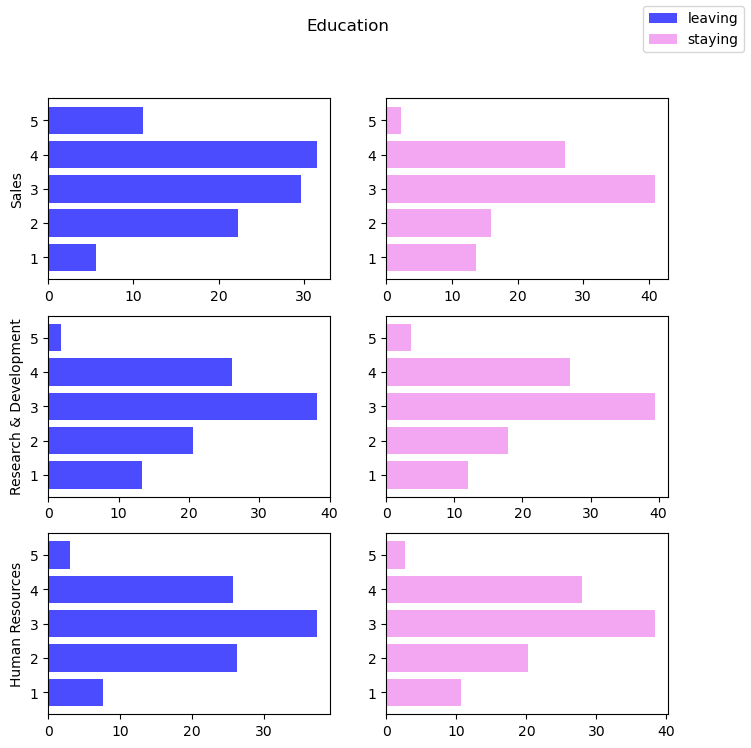

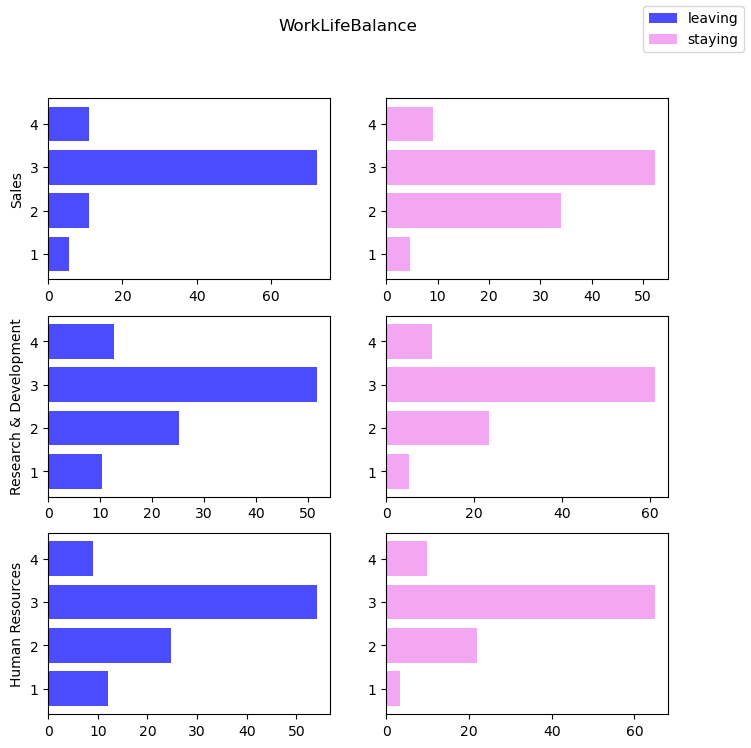

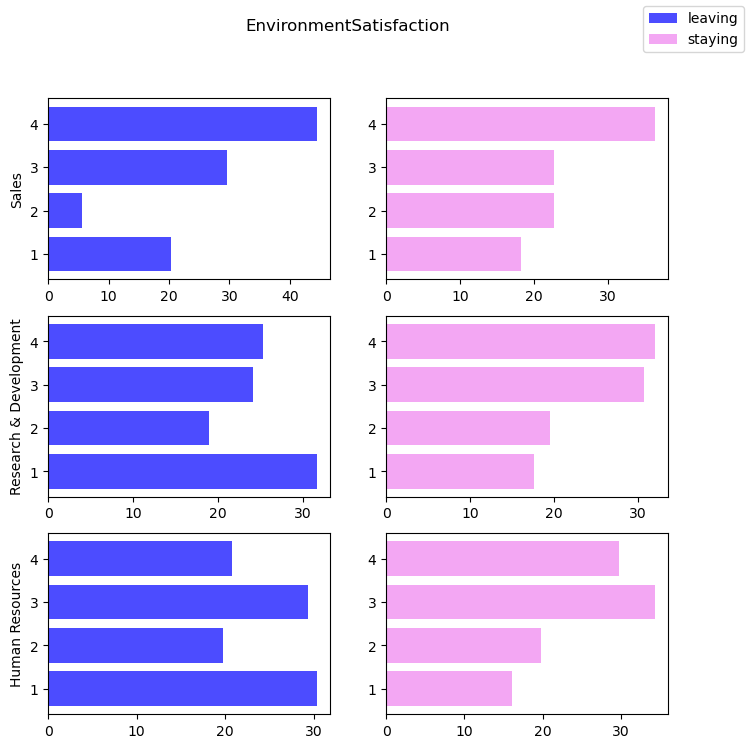

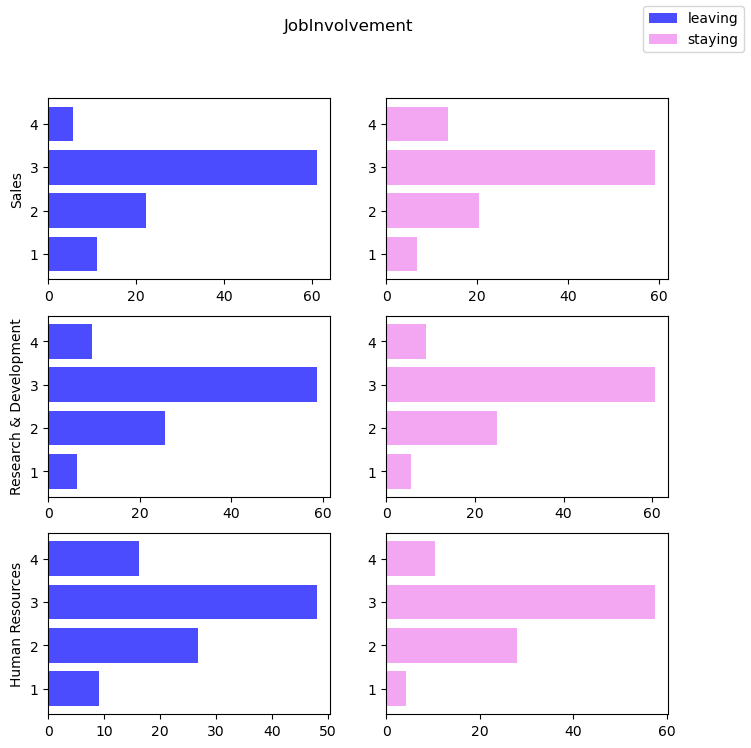

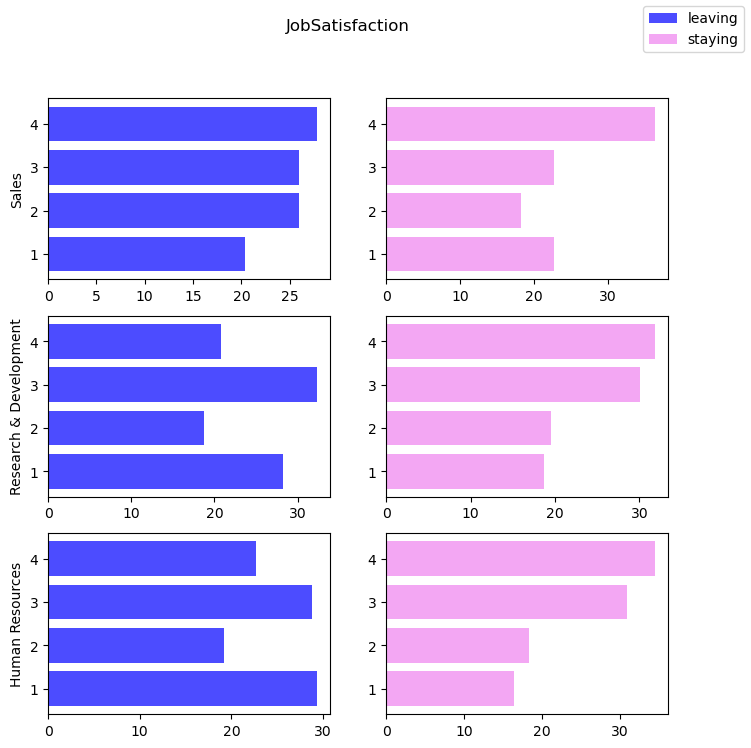

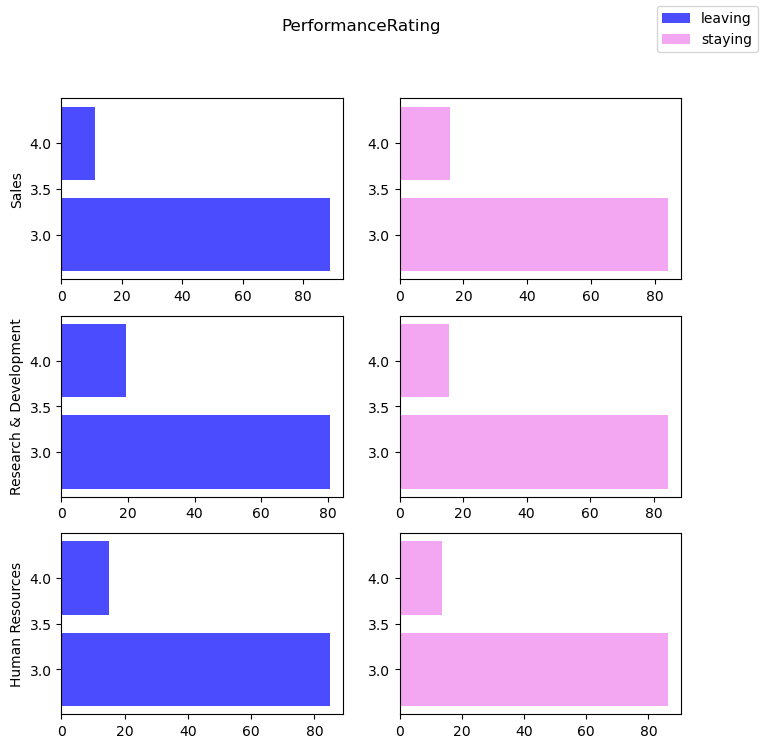

In [33]:
attrs = ["Education",  "WorkLifeBalance", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating"]
l1 = "Department"
idx = "EmployeeID"
depts = df[l1].sort_values().unique()

n1 = len(depts)

for l2 in attrs:

    
    jobsat = df[l2].sort_values().unique()


    leave_jobsat = leaving.groupby(by=[l1, l2]).count()[idx].to_numpy().reshape((len(departments), len(jobsat)))
    stay_jobsat = staying.groupby(by=[l1, l2]).count()[idx].to_numpy().reshape((len(departments), len(jobsat)))

    leave_jobsat_percents = (leave_jobsat / np.sum(leave_jobsat, axis=1).reshape((n1,1))) * 100
    stay_jobsat_percents = (stay_jobsat / np.sum(stay_jobsat, axis=1).reshape((n1,1))) * 100

    fig, axs = plt.subplots(n1,2,figsize=(8,8))


    for d in range(len(departments)):
        axs[d,0].set_ylabel(departments[d])
        axs[d,0].barh(range(int(jobsat[0]),int(jobsat[-1]+1)),leave_jobsat_percents[d], color='blue',alpha=0.7)
        axs[d,1].barh(range(int(jobsat[0]),int(jobsat[-1]+1)),stay_jobsat_percents[d], color='violet',alpha=0.7)

    fig.legend(labels=["leaving", "staying"])
    fig.suptitle(l2)

    plt.show()

In [34]:
education_fields = leaving["EducationField"].unique()
depts = leaving["Department"].unique()
dept_fields = np.zeros(shape=(len(departments), len(education_fields)))
dept_field_emps = leaving.groupby(
    ["Department", "EducationField"]).count()["EmployeeID"]

for d in range(len(depts)):
    for e in range(len(education_fields)):
        dept_fields[d, e] = dept_field_emps.get((depts[d], education_fields[e]), 0)
    
leaving_dept_field_percents = (dept_fields / np.sum(dept_fields, axis=1).reshape((3,1))) * 100


education_fields = staying["EducationField"].unique()
depts = leaving["Department"].unique()
dept_fields = np.zeros(shape=(len(departments), len(education_fields)))
dept_field_emps = leaving.groupby(
    ["Department", "EducationField"]).count()["EmployeeID"]

for d in range(len(depts)):
    for e in range(len(education_fields)):
        dept_fields[d, e] = dept_field_emps.get((depts[d], education_fields[e]), 0)
    
staying_dept_field_percents = (dept_fields / np.sum(dept_fields, axis=1).reshape((3,1))) * 100



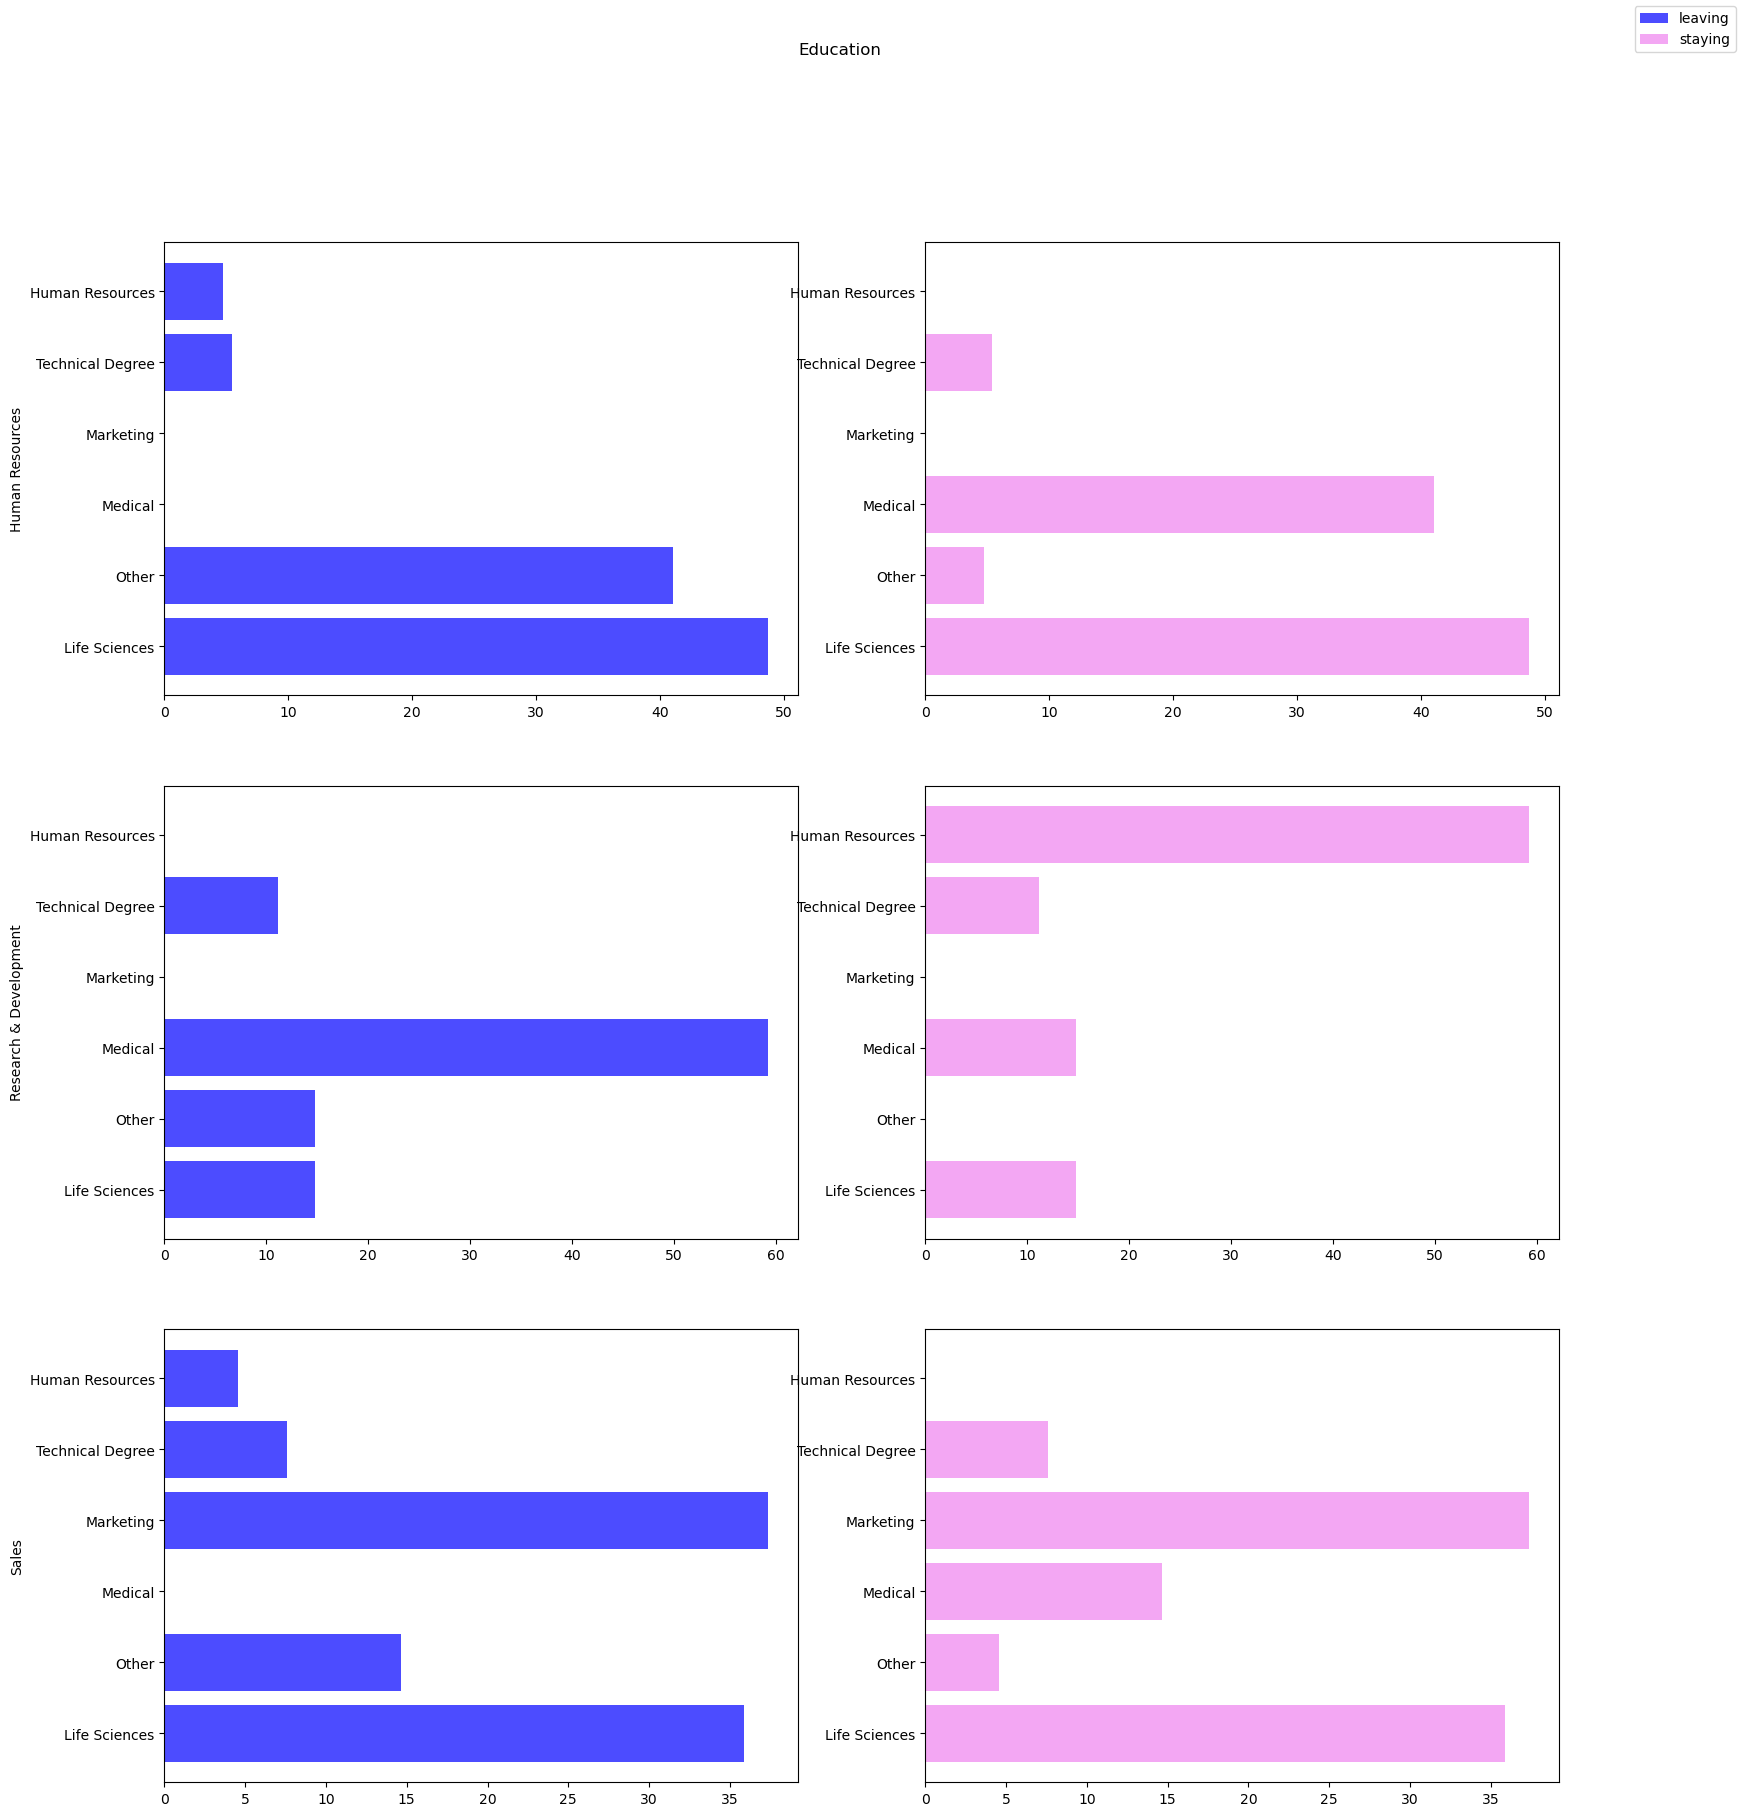

In [35]:
fig, axs = plt.subplots(3,2,figsize=(18,20))

axs[0,0].set_ylabel("Human Resources")
axs[0,0].barh(education_fields,leaving_dept_field_percents[0], color='blue',alpha=0.7)

axs[0,1].barh(education_fields, staying_dept_field_percents[0], color='violet',alpha=0.7)

axs[1,0].set_ylabel("Research & Development")
axs[1,0].barh(education_fields, leaving_dept_field_percents[1], color='blue',alpha=0.7)
axs[1,1].barh(education_fields, staying_dept_field_percents[1], color='violet',alpha=0.7)


axs[2,0].set_ylabel("Sales")
axs[2,0].barh(education_fields, leaving_dept_field_percents[2], color='blue',alpha=0.7)

axs[2,1].barh(education_fields, staying_dept_field_percents[2], color='violet',alpha=0.7)

fig.legend(labels=["leaving", "staying"])
fig.suptitle("Education")

plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   Department               4300 non-null   object 
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   JobLevel                 4300 non-null   int64  
 7   JobRole                  4300 non-null   object 
 8   MonthlyIncome            4300 non-null   int64  
 9   NumCompaniesWorked       4300 non-null   float64
 10  PercentSalaryHike        4300 non-null   int64  
 11  TotalWorkingYears        4300 non-null   float64
 12  TrainingTimesLastYear    4300 non-null   int64  
 13  YearsAtCompany           4300 non-null   int64  
 14  YearsSinceLastPromotion  4300

In [37]:
cleaned_monthly_income_df = iqr_cleaning(df, "MonthlyIncome")
cleaned_monthly_income_df["MonthlyIncome"].describe()

count     2151.000000
mean     50781.938633
std      13469.226373
min      29260.000000
25%      40350.000000
50%      49360.000000
75%      60840.000000
max      83800.000000
Name: MonthlyIncome, dtype: float64

In [38]:
cleaned_monthly_income_df.loc[:,"salary_group"] = pd.cut(cleaned_monthly_income_df["MonthlyIncome"], bins=[29000,30000,40000,50000,60000,70000,80000,90000])

/tmp/ipykernel_7636/3580956130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_monthly_income_df.loc[:,"salary_group"] = pd.cut(cleaned_monthly_income_df["MonthlyIncome"], bins=[29000,30000,40000,50000,60000,70000,80000,90000])


In [39]:
salary_groups = list(cleaned_monthly_income_df["salary_group"].sort_values().unique().astype('str'))
salary_grp_counts = cleaned_monthly_income_df.groupby(by=["salary_group", "Attrition"],observed=False).count()["EmployeeID"].to_numpy().reshape((len(salary_groups),2))

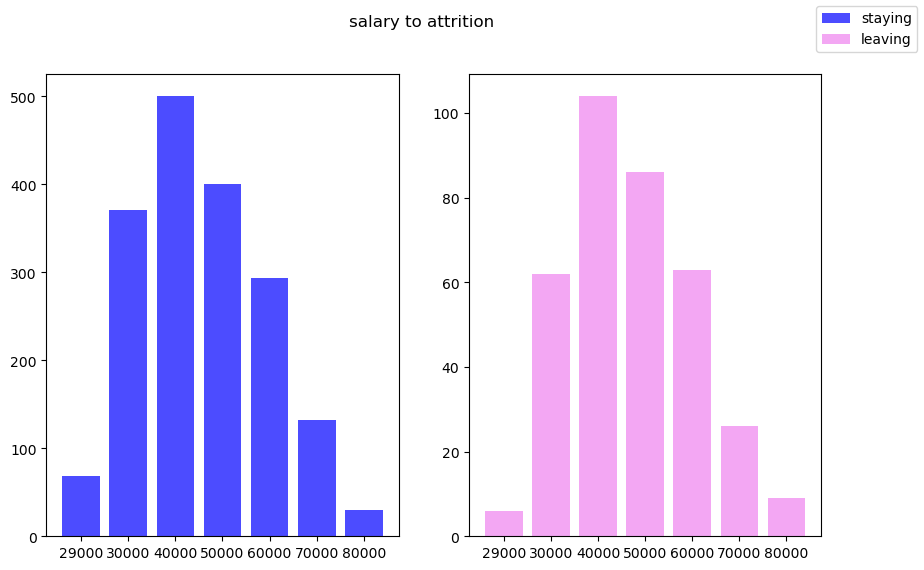

In [40]:

fig, axs = plt.subplots(1,2,figsize=(10,6))

# axs[0].pie(x=salary_grp_counts[:,0],labels=salary_groups)
x = ['29000','30000','40000','50000','60000','70000','80000']
axs[0].bar(x,salary_grp_counts[:,0],color='blue', alpha=0.7)
axs[1].bar(x,salary_grp_counts[:,1],color='violet', alpha=0.7)
fig.suptitle("salary to attrition")
fig.legend(labels=["staying", "leaving"])

plt.show()

In [41]:
clf = cleaned_monthly_income_df.query("MonthlyIncome >= 40000 and MonthlyIncome <=60000")
clf.head()

,EmployeeID,Age,Attrition,Department,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,salary_group
1,2,31,Yes,Research & Development,1,Life Sciences,1,Research Scientist,41890,0.0,...,6.0,3,5,1,3.0,2.0,4.0,2,4,"(40000, 50000]"
5,6,46,No,Research & Development,3,Life Sciences,4,Research Director,40710,3.0,...,28.0,5,7,7,3.0,2.0,2.0,3,3,"(40000, 50000]"
6,7,28,Yes,Research & Development,2,Medical,2,Sales Executive,58130,2.0,...,5.0,2,0,0,1.0,3.0,1.0,3,4,"(50000, 60000]"
12,13,55,No,Research & Development,4,Life Sciences,1,Sales Executive,55380,0.0,...,37.0,2,36,4,4.0,1.0,3.0,3,3,"(50000, 60000]"
13,14,47,Yes,Research & Development,1,Medical,1,Research Scientist,57620,1.0,...,10.0,4,10,9,1.0,2.0,2.0,2,3,"(50000, 60000]"


In [42]:
leaving_clf = clf.query("Attrition == 'Yes'")
staying_clf = clf.query("Attrition == 'No'")
leaving_clf.shape, staying_clf.shape

((193, 21), (900, 21))

In [43]:
attrs = ["Education",  "WorkLifeBalance", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating"]
print(iqr_cleaning(leaving_clf,"JobInvolvement").groupby(by=["Department"]).describe()["JobInvolvement"])
print(iqr_cleaning(staying_clf,"JobInvolvement").groupby(by=["Department"]).describe()["JobInvolvement"])

                        count      mean       std  min  25%  50%  75%  max
Department                                                                
Human Resources          16.0  2.812500  0.403113  2.0  3.0  3.0  3.0  3.0
Research & Development  105.0  2.514286  0.502193  2.0  2.0  3.0  3.0  3.0
Sales                    36.0  2.666667  0.478091  2.0  2.0  3.0  3.0  3.0
                        count      mean       std  min   25%  50%  75%  max
Department                                                                 
Human Resources          12.0  2.750000  0.452267  2.0  2.75  3.0  3.0  3.0
Research & Development  523.0  2.711281  0.453601  2.0  2.00  3.0  3.0  3.0
Sales                   228.0  2.750000  0.433965  2.0  2.75  3.0  3.0  3.0


In [44]:
staying_clf.groupby(by=["Department", "EnvironmentSatisfaction"]).count()["EmployeeID"]

Department              EnvironmentSatisfaction
Human Resources         1.0                          3
                        2.0                          3
                        3.0                          6
                        4.0                          9
Research & Development  1.0                         89
                        2.0                        103
                        3.0                        196
                        4.0                        228
Sales                   1.0                         41
                        2.0                         48
                        3.0                         99
                        4.0                         75
Name: EmployeeID, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   Department               4300 non-null   object 
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   JobLevel                 4300 non-null   int64  
 7   JobRole                  4300 non-null   object 
 8   MonthlyIncome            4300 non-null   int64  
 9   NumCompaniesWorked       4300 non-null   float64
 10  PercentSalaryHike        4300 non-null   int64  
 11  TotalWorkingYears        4300 non-null   float64
 12  TrainingTimesLastYear    4300 non-null   int64  
 13  YearsAtCompany           4300 non-null   int64  
 14  YearsSinceLastPromotion  4300

In [96]:
leaving.groupby(by=["JobRole","JobLevel"])["MonthlyIncome"].describe()

count           mean           std  \
JobRole                   JobLevel                                       
Healthcare Representative 1          12.0   52382.500000  25215.942333   
                          2          28.0   54760.714286  26379.659101   
                          3          12.0   41707.500000  34122.767160   
                          5           3.0   27910.000000      0.000000   
Human Resources           1          12.0   55177.500000  24749.840082   
                          3           3.0   30720.000000      0.000000   
                          4           6.0   40580.000000  28897.842134   
Laboratory Technician     1          38.0   58282.894737  35004.922118   
                          2          45.0   66702.000000  57298.595041   
                          3          24.0   43543.750000  28491.221503   
                          4          12.0   93270.000000  35798.829590   
                          5           3.0   53470.000000      0.000000   
Manager                   1          12.0   38822.500000  18161.967317   
                          2          24.0   55929.166667  50888.789396   
                          5           3.0   55610.000000      0.000000   
Manufacturing Director    1          15.0  101464.000000  33334.699167   
                          2          18.0   63926.666667  48640.823692   
                          3           3.0   28860.000000      0.000000   
                          4          12.0   74142.500000  63425.547781   
Research Director         1          25.0   58904.400000  50310.733205   
                          2          21.0   66880.000000  26313.556202   
                          3           3.0   34410.000000      0.000000   
                          4           3.0   67280.000000      0.000000   
                          5           2.0  100960.000000      0.000000   
Research Scientist        1          54.0   56440.555556  41861.028908   
                          2          72.0   79747.500000  54491.227301   
                          3          18.0   45196.666667  34936.585240   
                          4           9.0   69850.000000  27533.900468   
                          5           5.0   39882.000000   4069.578602   
Sales Executive           1          66.0   51663.636364  36298.536340   
                          2          55.0   63536.545455  48468.708241   
                          3          30.0   61322.000000  43934.230500   
                          4           6.0   57195.000000   2601.682148   
                          5           5.0   37602.000000  16448.108402   
Sales Representative      1          15.0   67592.000000  63993.719134   
                          2          12.0  106070.000000  81322.884065   
                          3           3.0   61180.000000      0.000000   
                          4           3.0   44240.000000      0.000000   
                          5           3.0   61620.000000      0.000000   

                                         min       25%       50%       75%  \
JobRole                   JobLevel                                           
Healthcare Representative 1          25010.0   32330.0   49120.0   69172.5   
                          2          23420.0   28620.0   48355.0   68250.0   
                          3          20700.0   22582.5   23945.0   43070.0   
                          5          27910.0   27910.0   27910.0   27910.0   
Human Resources           1          22070.0   40617.5   56125.0   70685.0   
                          3          30720.0   30720.0   30720.0   30720.0   
                          4          14200.0   14200.0   40580.0   66960.0   
Laboratory Technician     1          22850.0   36900.0   52200.0   63220.0   
                          2          17060.0   28360.0   43060.0   68110.0   
                          3          21680.0   26397.5   27890.0   52057.5   
                          4          52380.0   68805.0   88295.0 